# Feature Engineering
*Definition:* Feature engineering involves creating new features or transforming existing features to improve the performance of machine learning models. It is a crucial step for achieving better model performance and accuracy.

*Purpose:*

* Enhance the model's predictive power by providing it with more relevant and useful features.

* Allow the model to better understand the underlying patterns in the data.

# 1. Handling Missing Values

*Definition*

Handling missing values is crucial in data preprocessing. Common methods include imputation (replacing missing values with the mean, median, mode, or a specific value) and removing rows or columns with missing values.


In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer

#Sample Data
data = {
    'Feature 1' : [1.0, 2.0, None, 4.0, 5.0],
    'Feature 2' : [2.0, None, 4.0, 5.0, None],
    'Feature 3' : [None, 3.0, 3.5, 4.0, 4.5]
}

df = pd.DataFrame(data)

#Handling Missing Values
imputer = SimpleImputer(strategy = 'mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

print('After Imputation: \n',df_imputed)

After Imputation: 
    Feature 1  Feature 2  Feature 3
0        1.0   2.000000       3.75
1        2.0   3.666667       3.00
2        3.0   4.000000       3.50
3        4.0   5.000000       4.00
4        5.0   3.666667       4.50


# 2. Encoding Categorical Variables

*Definition*

Encoding categorical variables involves converting categorical data into a numerical format that can be used by machine learning algorithms. Common methods include one-hot encoding and label encoding.


In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#Sample Data
data = {
    'Color' : ['Red' , 'Blue' , 'Green' , 'Blue' , 'Red']
}

df = pd.DataFrame(data)

#Encoding categorical variables
encoder = OneHotEncoder(sparse = False)
encoded_categories = encoder.fit_transform(df[['Color']])
df_encoded = pd.DataFrame(encoded_categories, columns = encoder.get_feature_names_out(['Color']))
df = pd.concat([df, df_encoded], axis = 1).drop('Color', axis = 1)

print('After One- Hot Encoding: \n',df_encoded)

After One- Hot Encoding: 
    Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0
4         0.0          0.0        1.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# 3. Feature Scaling

*Definition*

Feature scaling involves normalizing or standardizing features so that they have a similar scale. Common methods include min-ma scaling and standardization (z-score normalization).

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Sample Data
data = {
    'Feature1' : [10,20,30,40,50],
    'Feature2' : [100,200,300,400,500]
}

df = pd.DataFrame(data)

#Feature Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

print('After Scaling: \n',df_scaled)

After Scaling: 
    Feature1  Feature2
0      0.00      0.00
1      0.25      0.25
2      0.50      0.50
3      0.75      0.75
4      1.00      1.00


# 4. Feature Creation

*Definition*

Feature creation involves generating new features froln existing ones to improve the predictive power of machine learning models. Common methods include polynomial features and interaction terms.

In [9]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

#Sample Data
data ={
    'Feature1' : [1,2,3,4,5,6],
    'Feature2' : [1,2,3,4,5,6]
}

df=pd.DataFrame(data)

#Feature Creation
poly = PolynomialFeatures(degree = 2, include_bias = False)
poly_features = poly.fit_transform(df)
df_poly = pd.DataFrame(poly_features, columns = poly.get_feature_names_out(['Feature1' , 'Feature2']))

print('After Polynomial Feature Creation: \n',df_poly)

After Polynomial Feature Creation: 
    Feature1  Feature2  Feature1^2  Feature1 Feature2  Feature2^2
0       1.0       1.0         1.0                1.0         1.0
1       2.0       2.0         4.0                4.0         4.0
2       3.0       3.0         9.0                9.0         9.0
3       4.0       4.0        16.0               16.0        16.0
4       5.0       5.0        25.0               25.0        25.0
5       6.0       6.0        36.0               36.0        36.0


# Feature Selection
*Definition:* Feature selection involves selecting a subset of relevant features (variables, predictors) for use in model construction. It aims to improve the model's performance by removing redundant or irrelevant features.

*Purpose:*

* Reduce overfitting: Less redundant data means less chance to make decisions based on noise.

* Improve accuracy: Less misleading data means modeling accuracy improves.

* Reduce training time: Fewer data points reduce algorithm complexity and speed up the training process.

# 1. Variance Thresholding
*Definition*

Variance Thresholding is a simple baseline approach to feature selection. It removes all features whose variance doesn't meet som threshold. By default, it removes all zero-variance features, ie, features that have the same value in all samples.

In [10]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

#Sample data
Data = {
    'Feature1' : [1,1,1,1,1],     # Low Variance
    'Feature2' : [2,3,4,5,6],
    'Feature3' : [3,4,5,6,7],
    'Constant' : [1,1,1,1,1]      # Zero Variance
}

df = pd.DataFrame(Data)

#Feature Selection
selector = VarianceThreshold(threshold = 0.1)
df_variance_filtered = pd.DataFrame(selector.fit_transform(df), columns = df.columns[selector.get_support()])

print('After Variance Thresholding: \n',df_variance_filtered)

After Variance Thresholding: 
    Feature2  Feature3
0         2         3
1         3         4
2         4         5
3         5         6
4         6         7


# 2. Correlation Matrix Filtering

*Definition*

Correlation Matrix Filtering involves computing the correlation matrix for the features in the dataset and removing one of each pair of features with a high correlation. This helps to reduce redundancy in the data

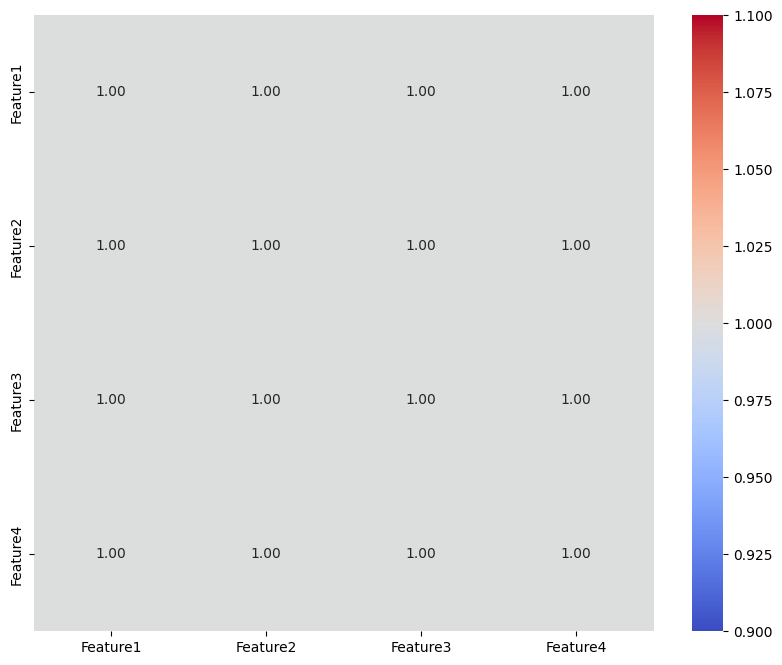

After Correlation Matrix Filtering: 
    Feature1
0         1
1         2
2         3
3         4
4         5


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Sample Data
data = {
    'Feature1' : [1,2,3,4,5],
    'Feature2' : [2,4,6,8,10],    #Highly correlated with Feature 1
    'Feature3' : [2,4,6,8,10],    #Highly correlated with Feature 2
    'Feature4' : [5,6,7,8,9]
}
df = pd.DataFrame(data)

#Correlation Matrix
corr_matrix = df.corr().abs()

#Plot Correlation Matrix
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm',fmt='.2f')
plt.show()

#Select upper triangle of Correlation Matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype('bool'))

#Finding features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

#Dropping features
df_corr_filtered = df.drop(to_drop, axis = 1)

print('After Correlation Matrix Filtering: \n',df_corr_filtered)

# 3. Domain Knowledge

*Definition*

Domain knowledge involves using expertise from the specific field or industry to manually select the most relevant features. This method leverages human understanding of which features are likely to be important.

In [12]:
import pandas as pd

#Sample Data
data = {
    'Age' : [25,30,35,40,45],
    'Salary' : [50000,60000,70000,80000,90000],
    'Height' : [5.5 , 6.0 , 5.8, 5.9,6.1],
    'Weight' : [150,160,170,180,190]
}

df = pd.DataFrame(data)

#Based on Domain knowledge we know Age and Salary are important
selected_featured_domain = df[['Age','Salary']]
print('Selected Features based on Domain Knowledge:\n',selected_featured_domain)

Selected Features based on Domain Knowledge:
    Age  Salary
0   25   50000
1   30   60000
2   35   70000
3   40   80000
4   45   90000
